#### The Normal Equation
There is a mathematical (Close Form) that finds the value of $\theta$ that minimizes the cost function.


$\hat\theta = \biggr(\mathbf X^t . \mathbf X \biggr)^{-1} .\mathbf X^T .\mathbf y$ Where $\hat\theta$ represents the value of $\theta$ that minimizes the cost function



In [6]:
import numpy as np
import numpy.random as rnd
import os
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12



In [7]:
#Generate random linear looking data
X = 2 * rnd.rand(100, 1)
y = 4 + 3 * X + rnd.randn(100, 1)
    

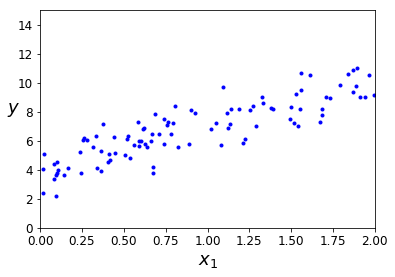

In [14]:
# plot it
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([0,2,0,15])
plt.show()

Compute $\hat\theta$ using the Normal Equation defined above. We will use the numpy LinearAlgebra module for Inv() function to compute the inverse of a matrix


In [46]:
import numpy.linalg as LA
x = np.ones((100, 1)) 
X_b = np.c_[x, X] # concatenate our features to array vector of 1's
theta_best = LA.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [47]:
theta_best

array([[ 4.06098157],
       [ 3.00661866]])


Note: Our data was generated by the function $y=4+3x_0 + Gaussian Noise$ 
our Normal Equation return reasonable close, bare in mind the noise would have made it impossible to recover the exact parameters of the original function


Lets pedict using $\hat\theta$

In [49]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[  4.06098157],
       [ 10.07421889]])

Plot this new models prediction


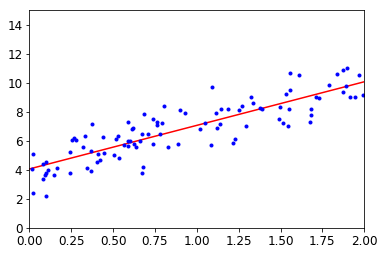

In [52]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

#### Computation Complexity of hte Normal Equation

The equation computes the inverse of $\mathbf X^T . \mathbf X$ which is effectively a $ n \times n$ matrix where $n$ is the number of features there are.
This inverse computation is in the order of $O\bigr(n^{2.4} \bigr)$ to $O\bigr(n^{3} \bigr)$
Effectively if the feature number is doubled the computation time increases by a factor of $2^{2.4}=5.3$ to $2^{3}=8$
### The normal equation effectively gets slower the larger the number of features

In [58]:
# Sklearn implementation
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 4.06098157]), array([[ 3.00661866]]))

In [59]:
lin_reg.predict(X_new)

array([[  4.06098157],
       [ 10.07421889]])